# Gaussian Process Parameter Effects

The purpose of this notebook is to highlight the effect of parameter choices of the process. The example is taken from [here](https://github.com/muatik/machine-learning-examples/blob/master/gaussianprocess2.ipynb).

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

import gp_basics

# https://stackoverflow.com/questions/37149933/how-to-set-max-output-width-in-numpy
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

sns.set(color_codes=True)

We always make use of the same data-points:

In [2]:
x = np.array([-2, -1, 0, 3.5, 4]);
y = np.array([4.1, 0.9, 2, 12.3, 15.8])

In [3]:
xpts = np.linspace(-5, 16, 400)

Let's do a first fit with "standard" parameters, e.g. with a length scale of $\ell=1.0$, an amplitude of the covariance function of $\sigma^2=1.0$ and a noise term of $\sigma_n=0.0$ (for the meaning of $\sigma_n$ please have a look at equation 2.25 in [chapter 2](http://www.gaussianprocess.org/gpml/chapters/RW2.pdf) of "Gaussian Processes for Machine Learning")

I take the implementations of the gaussian process and the coveriance functions from [`gp_basics.py`](https://github.com/cs224/dev-meetup-gaussian-processes).

In [4]:
k = gp_basics.GPCovarianceFunctionSquaredExponential(l=1.0, sigma=1.0)
y_pred, sigmas = gp_basics.predict(xpts, x, y, cov=k)

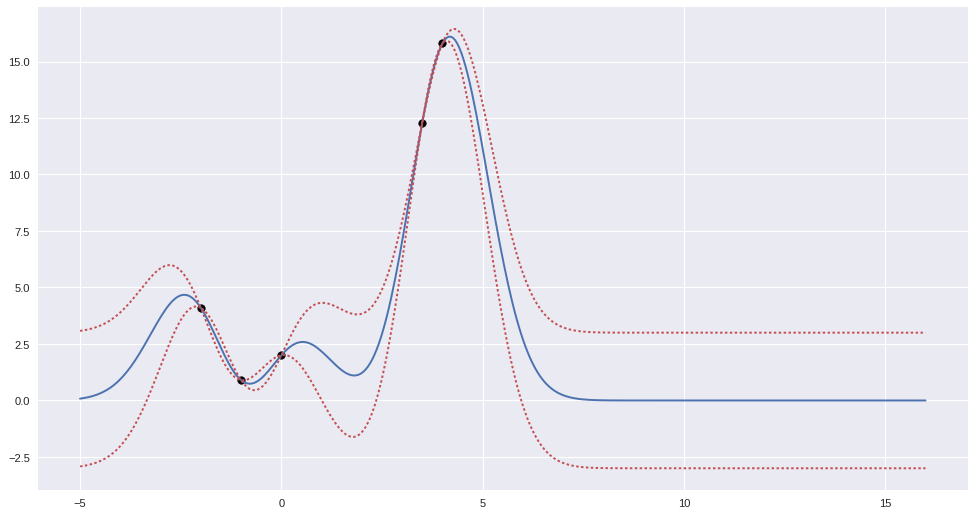

In [5]:
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)

ax.scatter(x, y, c="black")
ax.plot(xpts, y_pred[0], c="b")
ax.plot(xpts, y_pred[0] - np.sqrt(np.abs(sigmas[0])) * 3, "r:")
ax.plot(xpts, y_pred[0] + np.sqrt(np.abs(sigmas[0])) * 3, "r:")
# ax.errorbar(xpts, y_pred[0], yerr=sigmas[0], capsize=0)

As you can see the fitted curve in blue hits our given data points exactly and the variance goes to zero at these points. Far away of our given data points the fitted curve goes back to the mean function, which is $0$ in our case.

## Effect of the noise term $\sigma_n$ on the fit

Let's have a look what happens if we modify the noise term $\sigma_n$:

In [6]:
def create_case(l=1.0, sigma_n=0):
    k = gp_basics.GPCovarianceFunctionSquaredExponential(l=l, sigma=1.0)
    y_pred, sigmas = gp_basics.predict(xpts, x, y, cov=k, sigma_n=sigma_n)
    
    plt.scatter(x, y, c="black")
    plt.plot(xpts, y_pred[0], c="b")
    plt.plot(xpts, y_pred[0] - np.sqrt(np.abs(sigmas[0])) * 3, "r:")
    plt.plot(xpts, y_pred[0] + np.sqrt(np.abs(sigmas[0])) * 3, "r:")

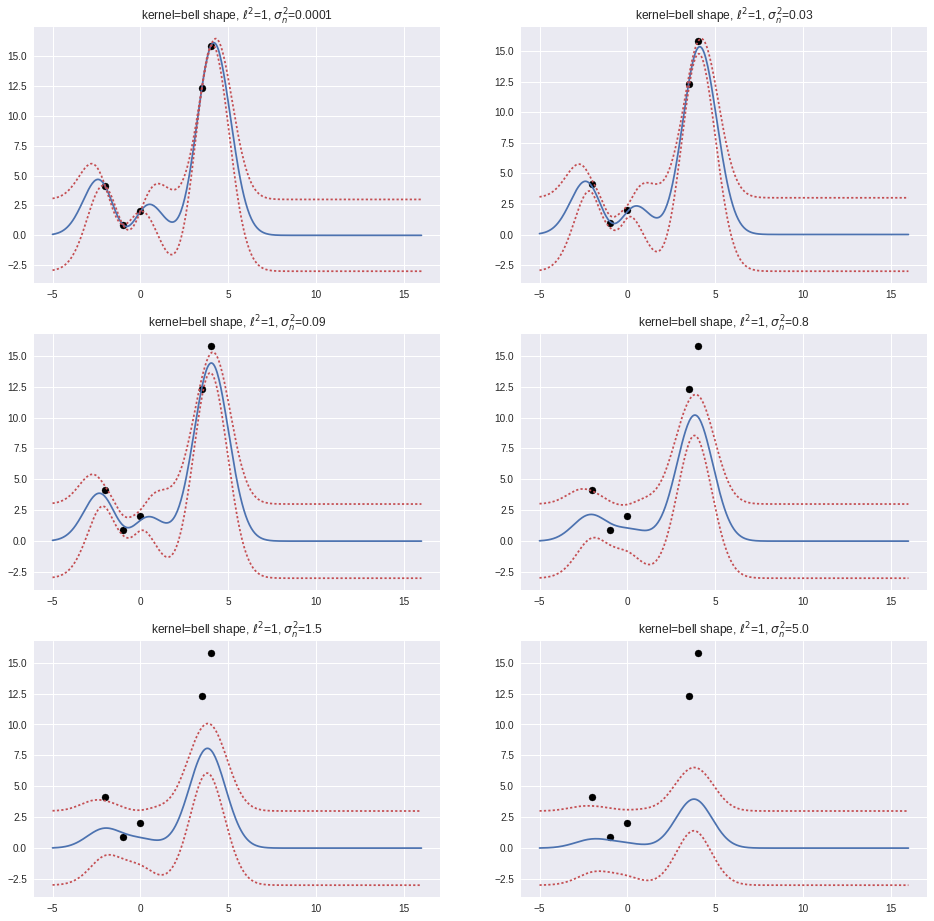

In [7]:
plt.figure(figsize=(16, 16))
for i, r in enumerate([0.0001, 0.03, 0.09, 0.8, 1.5, 5.0]):
    plt.subplot("32{}".format(i+1))
    plt.title("kernel={}, $\ell^2$={}, $\sigma_n^2$={}".format("bell shape", 1, r))
    create_case(sigma_n=np.sqrt(r))

The noise term tells how much you can trust the given points to be exact points of the curve to recover. In cases where you have some "measurement error" or similar you do not expect the points to exactly be located on the line, but with some probability scattered around it. The parameter $\sigma_n$ tells the gaussian process the level of noise to expect. Therefore, as we grow $\sigma_n$, more and more of the points are explained as "being noise" rather than a signal of where exactly the regression curve is located.

## Effect of the lengths scale $\ell$ on the fit

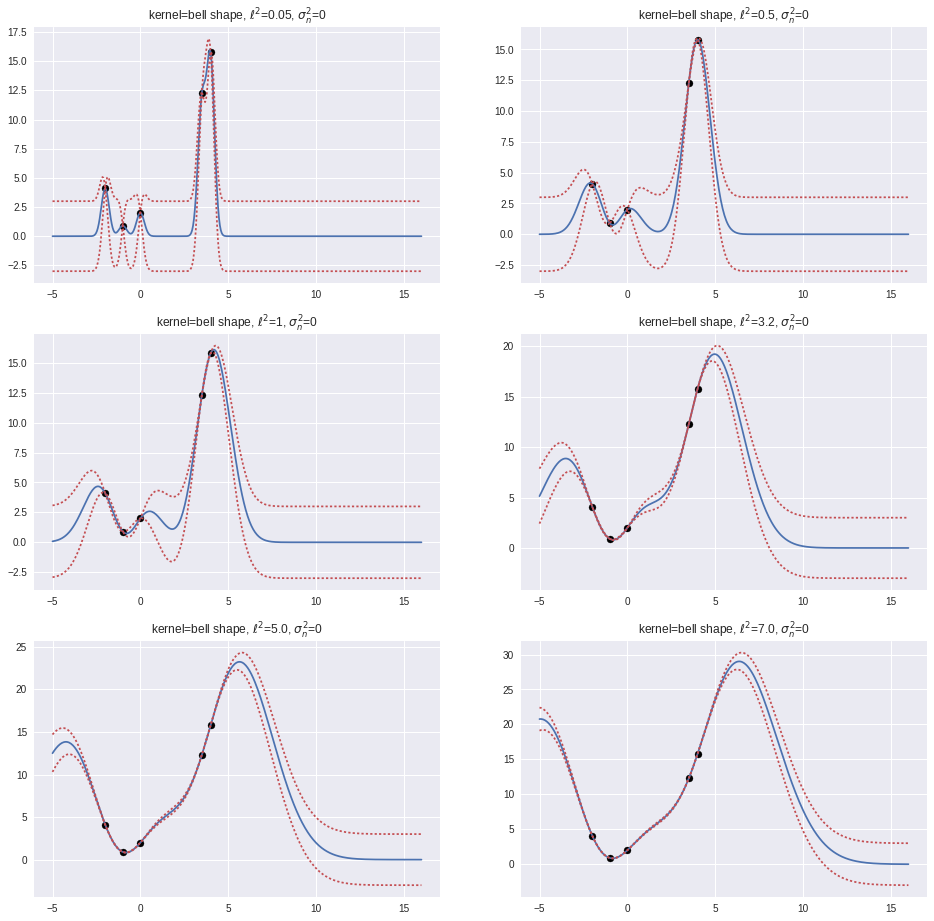

In [8]:
plt.figure(figsize=(16, 16))
for i, d in enumerate([0.05, 0.5, 1, 3.2, 5.0, 7.0]):
    plt.subplot("32{}".format(i+1))
    plt.title("kernel={}, $\ell^2$={}, $\sigma_n^2$={}".format("bell shape", d, 0))
    create_case(l=np.sqrt(d))

As you can see, as we grow the length scale the recovered regression curve becomes less "wiggly". In addition, the distance away from our concrete given points until when the curve returns to the mean function (in our case the $0$ line) increases.